# Image Classification usng Webcam
## Importing all the necessary modules for ML 

In [ ]:
import cv2
from keras.preprocessing import image
from keras.models import load_model
import numpy as np

In [ ]:
from google.colab.patches import cv2_imshow

## Code for webcam to work 

In [ ]:
# Code for web camera to work 
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

## Capturing image from webcam and displaying it

<IPython.core.display.Javascript object>

Saved to photo.jpg


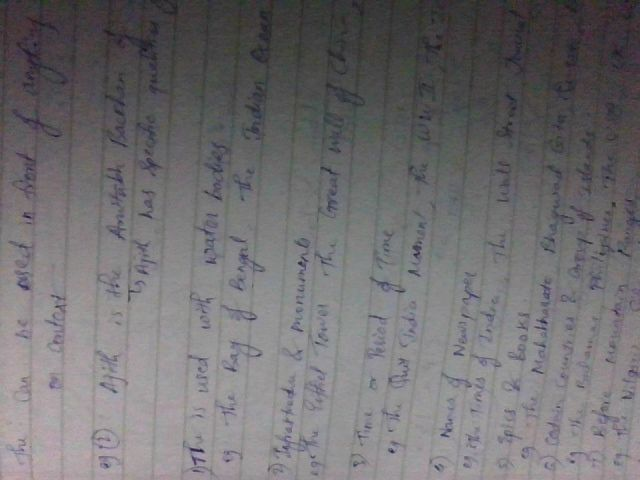

In [ ]:
# Capturing image from webcam and displaying it
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

## Finding objects in image captured

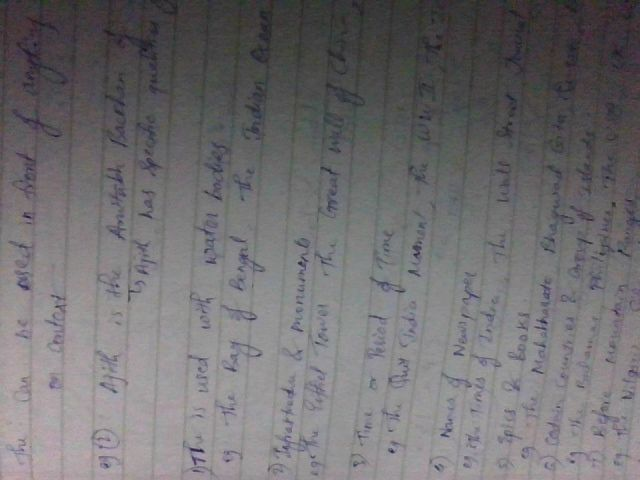

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
[3]
paper


In [ ]:
            display(Image('/content/photo.jpg')) # Displaying captured image
            img_ = cv2.imread('/content/photo.jpg', cv2.IMREAD_ANYCOLOR) #reading captured image
#             print("Converting RGB image to grayscale...")
#             gray = cv2.cvtColor(img_, cv2.COLOR_BGR2GRAY)
#             print("Converted RGB image to grayscale...")
#             print("Resizing image to 28x28 scale...")
#             img_ = cv2.resize(gray,(28,28))
#             print("Resized...")
#             img_resized = cv2.imwrite(filename='saved_img-final.jpg', img=img_)
           
            saved_model = load_model('/content/drive/My Drive/Colab Notebooks/Final year project/simulator/model_keras.h5')
            
#             img = cv2.imread('/content/drive/My Drive/Colab Notebooks/data/train/plastic/plastic205.jpg')
# print(img)
            img = cv2.resize(img_,(300,300))

            x = image.img_to_array(img)
            x = np.expand_dims(x, axis=0)
            images = np.vstack([x])
            classes = saved_model.predict_classes(images, batch_size=10)
            print(classes)
            if classes == 0:
              print("cardboard")
            elif classes == 1:
              print("glass")
            elif classes == 2:
              print("metal")
            elif classes == 3:
              print("paper")
            elif classes == 4:
              print("plastic")
            elif classes == 5:
              print("trash")
            
        

    

# Mounting Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Deployment

In [ ]:
!pip install streamlit

     |████████████████████████████████| 8.2MB 5.2MB/s 
     |████████████████████████████████| 81kB 9.1MB/s 
     |████████████████████████████████| 4.2MB 40.3MB/s 
     |████████████████████████████████| 174kB 44.6MB/s 
     |████████████████████████████████| 112kB 38.7MB/s 
     |████████████████████████████████| 122kB 49.8MB/s 
     |████████████████████████████████| 71kB 7.4MB/s 
  Created wheel for blinker: filename=blinker-1.4-cp37-none-any.whl size=13448 sha256=f8a29ff1d5f04469e666648b7feff65649d48cc3922d305fd8264575608f1dbe
  Stored in directory: /root/.cache/pip/wheels/92/a0/00/8690a57883956a301d91cf4ec999cc0b258b01e3f548f86e89
Successfully built blinker
ERROR: google-colab 1.0.0 has requirement ipykernel~=4.10, but you'll have ipykernel 5.5.5 which is incompatible.
  Found existing installation: ipykernel 4.10.1
    Uninstalling ipykernel-4.10.1:
      Successfully uninstalled ipykernel-4.10.1


In [ ]:
#obj detection 
%%writefile app.py

import streamlit as st
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image


def detect_objects(our_image):
    st.set_option('deprecation.showPyplotGlobalUse', False)

    col1, col2 = st.beta_columns(2)

    col1.subheader("Original Image")
    st.text("")
    plt.figure(figsize = (15,15))
    plt.imshow(our_image)
    col1.pyplot(use_column_width=True)

    # YOLO ALGORITHM
    net = cv2.dnn.readNet("yolov3.weights", "yolov3.cfg") # "yolov3.weights", "yolov3.cfg"

    classes = []
    with open("coco.names", "r") as f:
        classes = [line.strip() for line in f.readlines()]
    layer_names = net.getLayerNames()
    output_layers = [layer_names[i[0]-1] for i in net.getUnconnectedOutLayers()]

    colors = np.random.uniform(0,255,size=(len(classes), 3))   


    # LOAD THE IMAGE
    new_img = np.array(our_image.convert('RGB'))
    img = cv2.cvtColor(new_img,1)
    height,width,channels = img.shape


    # DETECTING OBJECTS (CONVERTING INTO BLOB)
    blob = cv2.dnn.blobFromImage(img, 0.00392, (416,416), (0,0,0), True, crop = False)   #(image, scalefactor, size, mean(mean subtraction from each layer), swapRB(Blue to red), crop)

    net.setInput(blob)
    outs = net.forward(output_layers)

    class_ids = []
    confidences = []
    boxes =[]

    # SHOWING INFORMATION CONTAINED IN 'outs' VARIABLE ON THE SCREEN
    for out in outs:
        for detection in out:
            scores = detection[5:]
            class_id = np.argmax(scores)  
            confidence = scores[class_id] 
            if confidence > 0.5:   
                # OBJECT DETECTED
                #Get the coordinates of object: center,width,height  
                center_x = int(detection[0] * width)
                center_y = int(detection[1] * height)
                w = int(detection[2] * width)  #width is the original width of image
                h = int(detection[3] * height) #height is the original height of the image

                # RECTANGLE COORDINATES
                x = int(center_x - w /2)   #Top-Left x
                y = int(center_y - h/2)   #Top-left y

                #To organize the objects in array so that we can extract them later
                boxes.append([x,y,w,h])
                confidences.append(float(confidence))
                class_ids.append(class_id)

    score_threshold = st.sidebar.slider("Confidence Threshold", 0.00,1.00,0.5,0.01)
    nms_threshold = st.sidebar.slider("NMS Threshold", 0.00, 1.00, 0.4, 0.01)

    indexes = cv2.dnn.NMSBoxes(boxes, confidences,score_threshold,nms_threshold)      
    print(indexes)

    font = cv2.FONT_HERSHEY_SIMPLEX
    items = []
    for i in range(len(boxes)):
        if i in indexes:
            x,y,w,h = boxes[i]
            #To get the name of object
            label = str.upper((classes[class_ids[i]]))   
            color = colors[i]
            cv2.rectangle(img,(x,y),(x+w,y+h),color,3)     
            items.append(label)


    st.text("")
    col2.subheader("Object-Detected Image")
    st.text("")
    plt.figure(figsize = (15,15))
    plt.imshow(img)
    col2.pyplot(use_column_width=True)

    if len(indexes)>1:
        st.success("Found {} Objects - {}".format(len(indexes),[item for item in set(items)]))
    else:
        st.success("Found {} Object - {}".format(len(indexes),[item for item in set(items)]))


def object_main():
    """OBJECT DETECTION APP"""

    st.title("Object Detection")
    # st.write("Object detection is a central algorithm in computer vision. The algorithm implemented below is YOLO (You Only Look Once), a state-of-the-art algorithm trained to identify thousands of objects types. It extracts objects from images and identifies them using OpenCV and Yolo. This task involves Deep Neural Networks(DNN), yolo trained model, yolo configuration and a dataset to detect objects.")

    # choice = st.radio("", ("Show Demo", "Browse an Image"))
    st.write()

    st.set_option('deprecation.showfileUploaderEncoding', False)
    image_file = st.file_uploader("Upload Image", type=['jpg','png','jpeg'])

    if image_file is not None:
        our_image = Image.open(image_file)  
        detect_objects(our_image)

    # if choice == "Browse an Image":
    #     st.set_option('deprecation.showfileUploaderEncoding', False)
    #     image_file = st.file_uploader("Upload Image", type=['jpg','png','jpeg'])

    #     if image_file is not None:
    #         our_image = Image.open(image_file)  
    #         detect_objects(our_image)

    # elif choice == "Show Demo":
    #     our_image = Image.open("images/person.jpg")
    #     detect_objects(our_image)

if __name__ == '__main__':
    object_main()


Writing app.py


coco weights

In [ ]:
!wget "https://pjreddie.com/media/files/yolov3.weights"
!wget "https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg"
!wget "https://raw.githubusercontent.com/pjreddie/darknet/master/data/coco.names"

--2021-05-20 14:48:03--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights.1’

yolov3.weights.1    100%[===================>] 236.52M  52.4MB/s    in 4.6s    

2021-05-20 14:48:08 (51.9 MB/s) - ‘yolov3.weights.1’ saved [248007048/248007048]

--2021-05-20 14:48:08--  https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8342 (8.1K) [text/plain]
Saving to: ‘yolov3.cfg.1’

yolov3.cfg.1        100%[===================>]   8.15K  --.-KB/s    in 0.0

In [ ]:
# !pip install pillow==4.1.1
# %reload_ext autoreload
# %autoreload

In [ ]:
!mkdir -p /content/ngrok-ssh
%cd /content/ngrok-ssh
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip -O ngrok-stable-linux-amd64.zip
!unzip -u ngrok-stable-linux-amd64.zip
!cp /content/ngrok-ssh/ngrok /ngrok
!chmod +x /ngrok
%cd /content

/content/ngrok-ssh
--2021-05-26 04:13:35--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 54.224.27.210, 54.159.163.191, 34.226.165.133, ...
Connecting to bin.equinox.io (bin.equinox.io)|54.224.27.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13832437 (13M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip’

ngrok-stable-linux- 100%[===================>]  13.19M  31.3MB/s    in 0.4s    

2021-05-26 04:13:36 (31.3 MB/s) - ‘ngrok-stable-linux-amd64.zip’ saved [13832437/13832437]

Archive:  ngrok-stable-linux-amd64.zip
  inflating: ngrok                   
/content


In [ ]:
!/ngrok authtoken 1qfHyHLlOSOUTZVy7uoSjtGb3f5_2TVSWLEBVkNAFK6ZuRK3G

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [ ]:
!nohup streamlit run app.py &

nohup: appending output to 'nohup.out'


In [ ]:
# !pip install pyngrok

In [ ]:
!pip install pyngrok==4.1.1

  Created wheel for pyngrok: filename=pyngrok-4.1.1-cp37-none-any.whl size=15971 sha256=f479195441577cf09261661142d0d806fca8679f45e6392d00c92033356035c4
  Stored in directory: /root/.cache/pip/wheels/97/71/0d/1695f7c8815c0beb3b5d9b35d6eec9243c87e6070fbe3977fa
Successfully built pyngrok


In [ ]:
from pyngrok import ngrok
url = ngrok.connect(port='8501')
url

'http://b7c29ad760cd.ngrok.io'

In [ ]:
# !kill 834

/bin/bash: line 0: kill: (834) - No such process


In [ ]:
# !kill 6e0d71a7f67a

/bin/bash: line 0: kill: 6e0d71a7f67a: arguments must be process or job IDs


In [ ]:
# $(ps ax | grep "searchd")

SyntaxError: ignored

In [ ]:
# !kill $(ps aux | awk '{print $2}')

In [ ]:
!cat ./nohup.out


  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.2:8501
  External URL: http://35.201.153.7:8501



In [ ]:
pwd

'/content'

not required part

In [ ]:
# mv "/content/app.py" "/drive/ngrok-ssh"

In [ ]:
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip

--2021-04-04 05:28:53--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 34.195.37.70, 34.196.3.7, 52.21.175.83, ...
Connecting to bin.equinox.io (bin.equinox.io)|34.195.37.70|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14746350 (14M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip’

ngrok-stable-linux- 100%[===================>]  14.06M  13.7MB/s    in 1.0s    

2021-04-04 05:28:54 (13.7 MB/s) - ‘ngrok-stable-linux-amd64.zip’ saved [14746350/14746350]



In [ ]:
!unzip ngrok-stable-linux-amd64.zip

Archive:  ngrok-stable-linux-amd64.zip
  inflating: ngrok                   


In [ ]:
get_ipython().system_raw('./ngrok http 80 &')

In [ ]:
!curl -s http://localhost:4040/api/tunnels | python3 -c \
    'import sys, json; print("Execute the next cell and the go to the following URL: " +json.load(sys.stdin)["tunnels"][0]["public_url"])'

Traceback (most recent call last):
  File "<string>", line 1, in <module>
  File "/usr/lib/python3.7/json/__init__.py", line 296, in load
    parse_constant=parse_constant, object_pairs_hook=object_pairs_hook, **kw)
  File "/usr/lib/python3.7/json/__init__.py", line 348, in loads
    return _default_decoder.decode(s)
  File "/usr/lib/python3.7/json/decoder.py", line 337, in decode
    obj, end = self.raw_decode(s, idx=_w(s, 0).end())
  File "/usr/lib/python3.7/json/decoder.py", line 355, in raw_decode
    raise JSONDecodeError("Expecting value", s, err.value) from None
json.decoder.JSONDecodeError: Expecting value: line 1 column 1 (char 0)


In [ ]:
!streamlit run /drive/ngrok-ssh/app.py

2021-04-03 18:09:24.824947: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0

  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.2:8501
  External URL: http://35.224.4.47:8501

  Stopping...
  Stopping...


Not required

In [ ]:
%%writefile app.py
import streamlit as st
import tensorflow as tf
from keras.models import load_model

st.set_option('deprecation.showfileUploaderEncoding',False)
@st.cache(allow_output_mutation=True)
# def load_model():
#   model = tf.keras.model.load_model('/content/drive/My Drive/Colab Notebooks/Final year project/simulator/model_keras.h5',compile=False)
#   return model
model = load_model('/content/drive/My Drive/Colab Notebooks/Final year project/simulator/model_keras.h5',compile=False)
# model = load_model()
st.write("Waste classification")
file = st.file_uploader("Please upload a waste image", type=["jpg","png"])
import cv2
from PIL import Image, ImageOps
import numpy as np
def import_and_predict(image_data,model):
  size = (180,180)
  image = ImageOps.fit(image_data, size, Image.ANTIALIAS)
  img = np.asarray(image)
  img_reshape = img[np.newaxis,...]
  prediction = model.predict(img_reshape)

  return prediction
if file is None:
  st.text("Please upload an image file")
else:
  image = Image.open(file)
  st.image(image, use_column_width=True)
  predictions = import_and_predict(image, model)
  class_names = ['cardboard','glass', 'metal', 'paper', 'plastic', 'trash']
  string = "This image most likely is: "+class_names[np.argmax(predictions)]
  st.success(string)



Overwriting app.py


In [ ]:
%%writefile app.py


from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16

def predict(image1): 
    model = VGG16()
    image = load_img(image1, target_size=(224, 224))
    # convert the image pixels to a numpy array
    image = img_to_array(image)
    # reshape data for the model
    image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
    # prepare the image for the VGG model
    image = preprocess_input(image)
    # predict the probability across all output classes
    yhat = model.predict(image)
    # convert the probabilities to class labels
    label = decode_predictions(yhat)
    # retrieve the most likely result, e.g. highest probability
    label = label[0][0]
    return label 

import streamlit as st 
from PIL import Image
# from classify import predict


st.title("Waste Classification")

uploaded_file = st.file_uploader("Choose an image...", type="jpg")
st.write(type(uploaded_file))
if uploaded_file is not None:
    image = Image.open(uploaded_file)
    st.image(image, caption='Uploaded Image.', use_column_width=True)
    st.write("")
    st.write("Classifying...")
    label = predict(uploaded_file)
    st.write('%s (%.2f%%)' % (label[1], label[2]*100))

Overwriting app.py


In [ ]:
#marten sukel
%%writefile app.py

import streamlit as st
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image


def detect_objects(our_image):
    st.set_option('deprecation.showPyplotGlobalUse', False)

    col1, col2 = st.beta_columns(2)

    col1.subheader("Original Image")
    st.text("")
    plt.figure(figsize = (15,15))
    plt.imshow(our_image)
    col1.pyplot(use_column_width=True)

    # YOLO ALGORITHM
    net = cv2.dnn.readNet("yolov3_garb_40000.weights", "yolov3_garb_test.cfg") # "yolov3.weights", "yolov3.cfg"

    classes = []
    with open("garb.names", "r") as f:
        classes = [line.strip() for line in f.readlines()]
    layer_names = net.getLayerNames()
    output_layers = [layer_names[i[0]-1] for i in net.getUnconnectedOutLayers()]

    colors = np.random.uniform(0,255,size=(len(classes), 3))   


    # LOAD THE IMAGE
    new_img = np.array(our_image.convert('RGB'))
    img = cv2.cvtColor(new_img,1)
    height,width,channels = img.shape


    # DETECTING OBJECTS (CONVERTING INTO BLOB)
    blob = cv2.dnn.blobFromImage(img, 0.00392, (416,416), (0,0,0), True, crop = False)   #(image, scalefactor, size, mean(mean subtraction from each layer), swapRB(Blue to red), crop)

    net.setInput(blob)
    outs = net.forward(output_layers)

    class_ids = []
    confidences = []
    boxes =[]

    # SHOWING INFORMATION CONTAINED IN 'outs' VARIABLE ON THE SCREEN
    for out in outs:
        for detection in out:
            scores = detection[5:]
            class_id = np.argmax(scores)  
            confidence = scores[class_id] 
            if confidence > 0.5:   
                # OBJECT DETECTED
                #Get the coordinates of object: center,width,height  
                center_x = int(detection[0] * width)
                center_y = int(detection[1] * height)
                w = int(detection[2] * width)  #width is the original width of image
                h = int(detection[3] * height) #height is the original height of the image

                # RECTANGLE COORDINATES
                x = int(center_x - w /2)   #Top-Left x
                y = int(center_y - h/2)   #Top-left y

                #To organize the objects in array so that we can extract them later
                boxes.append([x,y,w,h])
                confidences.append(float(confidence))
                class_ids.append(class_id)

    score_threshold = st.sidebar.slider("Confidence Threshold", 0.00,1.00,0.5,0.01)
    nms_threshold = st.sidebar.slider("NMS Threshold", 0.00, 1.00, 0.4, 0.01)

    indexes = cv2.dnn.NMSBoxes(boxes, confidences,score_threshold,nms_threshold)      
    print(indexes)

    font = cv2.FONT_HERSHEY_SIMPLEX
    items = []
    for i in range(len(boxes)):
        if i in indexes:
            x,y,w,h = boxes[i]
            #To get the name of object
            label = str.upper((classes[class_ids[i]]))   
            color = colors[i]
            cv2.rectangle(img,(x,y),(x+w,y+h),color,3)     
            items.append(label)


    st.text("")
    col2.subheader("Object-Detected Image")
    st.text("")
    plt.figure(figsize = (15,15))
    plt.imshow(img)
    col2.pyplot(use_column_width=True)

    if len(indexes)>1:
        st.success("Found {} Objects - {}".format(len(indexes),[item for item in set(items)]))
    else:
        st.success("Found {} Object - {}".format(len(indexes),[item for item in set(items)]))


def object_main():
    """OBJECT DETECTION APP"""

    st.title("Object Detection")
    # st.write("Object detection is a central algorithm in computer vision. The algorithm implemented below is YOLO (You Only Look Once), a state-of-the-art algorithm trained to identify thousands of objects types. It extracts objects from images and identifies them using OpenCV and Yolo. This task involves Deep Neural Networks(DNN), yolo trained model, yolo configuration and a dataset to detect objects.")

    choice = st.radio("", ("Show Demo", "Browse an Image"))
    st.write()

    if choice == "Browse an Image":
        st.set_option('deprecation.showfileUploaderEncoding', False)
        image_file = st.file_uploader("Upload Image", type=['jpg','png','jpeg'])

        if image_file is not None:
            our_image = Image.open(image_file)  
            detect_objects(our_image)

    elif choice == "Show Demo":
        our_image = Image.open("images/person.jpg")
        detect_objects(our_image)

if __name__ == '__main__':
    object_main()


Overwriting app.py


using marten sukel weights

In [ ]:
!gdown --id 1tPCvuEZG7tNVO9x4DC4cRlD1ynThUDvG #weights 
!gdown --id 1btqUSuI4XzpKRMFP7-oFTo4BkaHIUFt3 #cfg
!gdown --id 1e3AkiGDBNduZqJeRMNAyuSnquJTcPAIU #names

Downloading...
From: https://drive.google.com/uc?id=1tPCvuEZG7tNVO9x4DC4cRlD1ynThUDvG
To: /content/yolov3_garb_40000.weights
247MB [00:01, 219MB/s]
Downloading...
From: https://drive.google.com/uc?id=1btqUSuI4XzpKRMFP7-oFTo4BkaHIUFt3
To: /content/yolov3_garb_test.cfg
100% 8.31k/8.31k [00:00<00:00, 19.6MB/s]
Downloading...
From: https://drive.google.com/uc?id=1e3AkiGDBNduZqJeRMNAyuSnquJTcPAIU
To: /content/garb.names
100% 189/189 [00:00<00:00, 293kB/s]


# Object Detection

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from PIL import Image
from matplotlib import pyplot as plt
from tensorflow.python.util import compat
from tensorflow.core.protobuf import saved_model_pb2
from google.protobuf import text_format
import pprint
import json
import os

In [ ]:
# needed to install object_detection library and enlarge labels
! rm -rf ./models && git clone https://github.com/tensorflow/models.git \
    && sed -i "s#ImageFont.truetype('arial.ttf', 24)#ImageFont.truetype('arial.ttf', 50)#g" ./models/research/object_detection/utils/visualization_utils.py \
    && cp /usr/share/fonts/truetype/dejavu/DejaVuSans.ttf /usr/share/fonts/truetype/dejavu/arial.ttf


Cloning into 'models'...
remote: Enumerating objects: 57413, done.
remote: Counting objects: 100% (1476/1476), done.
remote: Compressing objects: 100% (554/554), done.
remote: Total 57413 (delta 1015), reused 1336 (delta 906), pack-reused 55937
Receiving objects: 100% (57413/57413), 572.93 MiB | 29.99 MiB/s, done.
Resolving deltas: 100% (39678/39678), done.
cp: cannot stat '/usr/share/fonts/truetype/dejavu/DejaVuSans.ttf': No such file or directory


In [ ]:
mkdir /usr/share/fonts/truetype/dejavu

In [ ]:
cp /usr/share/fonts/truetype/liberation/LiberationSerif-Regular.ttf /usr/share/fonts/truetype/dejavu/arial.ttf

In [ ]:
pip --version

pip 19.3.1 from /usr/local/lib/python3.7/dist-packages/pip (python 3.7)


In [ ]:
pip install --upgrade pip==20.2.2

     |████████████████████████████████| 1.5MB 4.4MB/s 
  Found existing installation: pip 19.3.1
    Uninstalling pip-19.3.1:
      Successfully uninstalled pip-19.3.1


In [ ]:
# install object_detection library
! cd models/research \
    && protoc object_detection/protos/*.proto --python_out=. \
    && cp object_detection/packages/tf2/setup.py . && \
    python3 -m pip install --use-feature=2020-resolver .


Processing /content/models/research
     |████████████████████████████████| 352 kB 5.0 MB/s 
     |████████████████████████████████| 1.6 MB 46.7 MB/s 
     |████████████████████████████████| 172 kB 37.6 MB/s 
     |████████████████████████████████| 99 kB 7.6 MB/s 
     |████████████████████████████████| 636 kB 47.0 MB/s 
     |████████████████████████████████| 679 kB 47.1 MB/s 
     |████████████████████████████████| 9.6 MB 41.5 MB/s 
     |████████████████████████████████| 829 kB 42.6 MB/s 
     |████████████████████████████████| 151 kB 53.7 MB/s 
     |████████████████████████████████| 61 kB 6.4 MB/s 
     |████████████████████████████████| 43 kB 1.8 MB/s 
     |████████████████████████████████| 1.2 MB 35.8 MB/s 
     |████████████████████████████████| 38.2 MB 36 kB/s 
     |████████████████████████████████| 54 kB 2.3 MB/s 
     |████████████████████████████████| 2.2 MB 18.7 MB/s 
  Created wheel for object-detection: filename=object_detection-0.1-py3-none-any.whl size=1650080 sha256

In [ ]:
pip install tensorflow

In [ ]:
from object_detection.utils import visualization_utils as vis_util
from object_detection.utils import dataset_util, label_map_util
from object_detection.protos import string_int_label_map_pb2

In [ ]:
# reconstruct frozen graph
def reconstruct(pb_path):
    if not os.path.isfile(pb_path):
        print("Error: %s not found" % pb_path)

    print("Reconstructing Tensorflow model")
    detection_graph = tf.Graph()
    with detection_graph.as_default():
        od_graph_def = tf.compat.v1.GraphDef()
        with tf.io.gfile.GFile(pb_path, 'rb') as fid:
            serialized_graph = fid.read()
            od_graph_def.ParseFromString(serialized_graph)
            tf.import_graph_def(od_graph_def, name='')
    print("Success!")
    return detection_graph


In [ ]:
# visualize detection
def image2np(image):
    (w, h) = image.size
    return np.array(image.getdata()).reshape((h, w, 3)).astype(np.uint8)

def image2tensor(image):
    npim = image2np(image)
    return np.expand_dims(npim, axis=0)

%matplotlib inline
def detect(detection_graph, test_image_path):
    with detection_graph.as_default():
        gpu_options = tf.compat.v1.GPUOptions(per_process_gpu_memory_fraction=0.01)
        with tf.compat.v1.Session(graph=detection_graph,config=tf.compat.v1.ConfigProto(gpu_options=gpu_options)) as sess:
            image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')
            detection_boxes = detection_graph.get_tensor_by_name('detection_boxes:0')
            detection_scores = detection_graph.get_tensor_by_name('detection_scores:0')
            detection_classes = detection_graph.get_tensor_by_name('detection_classes:0')
            num_detections = detection_graph.get_tensor_by_name('num_detections:0')

            image = Image.open(test_image_path)
            (boxes, scores, classes, num) = sess.run(
                [detection_boxes, detection_scores, detection_classes, num_detections],
                feed_dict={image_tensor: image2tensor(image)}
            )

            npim = image2np(image)
            vis_util.visualize_boxes_and_labels_on_image_array(
                npim,
                np.squeeze(boxes),
                np.squeeze(classes).astype(np.int32),
                np.squeeze(scores),
                category_index,
                use_normalized_coordinates=True,
                line_thickness=15)
            plt.figure(figsize=(12, 8))
            plt.imshow(npim)
            plt.show()
            
            # print("squeeze boxes", np.squeeze(boxes))
            print("squeeze scores", np.squeeze(scores))
            print("category index", category_index)
            print("Classes", np.squeeze(classes).astype(np.int32))
            # print("npim", npim)
            # print("detection scores", detection_scores)
            # print("num detections", num_detections)
            print("detection classes", detection_classes)

            print("Class is:")
            # print([category_index.get(i) for i in classes[0]: if scores[0, i] > min_score_thresh)])
            L = ([category_index.get(i) for i in classes[0]])
            u_value = set( val for dic in L for val in dic.values())
            print("Unique Values: ",u_value)

            print(scores[0])
            

# Create LabelMap

First we need to create the label map.

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/Colab Notebooks/Kaggle"
# /content/gdrive/My Drive/Kaggle is the path where kaggle.json is present in the Google Drive

In [ ]:
cp "/content/drive/MyDrive/Colab Notebooks/Kaggle/kaggle.json" "/content"

In [ ]:
!kaggle datasets download -d kneroma/tacotrashdataset

100% 2.78G/2.79G [00:31<00:00, 106MB/s] 
100% 2.79G/2.79G [00:31<00:00, 94.0MB/s]


In [ ]:
!unzip "/content/tacotrashdataset.zip" -d "/content/tacotrashdataset"

Archive:  /content/tacotrashdataset.zip
  inflating: /content/tacotrashdataset/best-checkpoint-003epoch.bin  
  inflating: /content/tacotrashdataset/data/annotations.json  
  inflating: /content/tacotrashdataset/data/batch_1/000000.jpg  
  inflating: /content/tacotrashdataset/data/batch_1/000001.jpg  
  inflating: /content/tacotrashdataset/data/batch_1/000003.jpg  
  inflating: /content/tacotrashdataset/data/batch_1/000004.jpg  
  inflating: /content/tacotrashdataset/data/batch_1/000005.jpg  
  inflating: /content/tacotrashdataset/data/batch_1/000006.jpg  
  inflating: /content/tacotrashdataset/data/batch_1/000007.jpg  
  inflating: /content/tacotrashdataset/data/batch_1/000008.jpg  
  inflating: /content/tacotrashdataset/data/batch_1/000010.jpg  
  inflating: /content/tacotrashdataset/data/batch_1/000011.jpg  
  inflating: /content/tacotrashdataset/data/batch_1/000012.jpg  
  inflating: /content/tacotrashdataset/data/batch_1/000013.jpg  
  inflating: /content/tacotrashdataset/data/bat

In [ ]:
# rm -rf "/content/data"
# rm "/content/tacotrashdataset.zip"

In [ ]:
DATA_DIR = '/content/tacotrashdataset/data'
ANNOTATIONS_FILE = os.path.join(DATA_DIR, 'annotations.json')
NCLASSES = 60

In [ ]:
with open(ANNOTATIONS_FILE) as json_file:
    data = json.load(json_file)
    
categories = data['categories']

In [ ]:
print('Building label map from examples')

labelmap = string_int_label_map_pb2.StringIntLabelMap()
for idx,category in enumerate(categories):
    item = labelmap.item.add()
    # label map id 0 is reserved for the background label
    item.id = int(category['id'])+1
    item.name = category['name']

with open('./labelmap.pbtxt', 'w') as f:
    f.write(text_format.MessageToString(labelmap))

print('Label map witten to labelmap.pbtxt')

with open('./labelmap.pbtxt') as f:
    pprint.pprint(f.readlines())


Building label map from examples
Label map witten to labelmap.pbtxt
['item {\n',
 '  name: "Aluminium foil"\n',
 '  id: 1\n',
 '}\n',
 'item {\n',
 '  name: "Battery"\n',
 '  id: 2\n',
 '}\n',
 'item {\n',
 '  name: "Aluminium blister pack"\n',
 '  id: 3\n',
 '}\n',
 'item {\n',
 '  name: "Carded blister pack"\n',
 '  id: 4\n',
 '}\n',
 'item {\n',
 '  name: "Other plastic bottle"\n',
 '  id: 5\n',
 '}\n',
 'item {\n',
 '  name: "Clear plastic bottle"\n',
 '  id: 6\n',
 '}\n',
 'item {\n',
 '  name: "Glass bottle"\n',
 '  id: 7\n',
 '}\n',
 'item {\n',
 '  name: "Plastic bottle cap"\n',
 '  id: 8\n',
 '}\n',
 'item {\n',
 '  name: "Metal bottle cap"\n',
 '  id: 9\n',
 '}\n',
 'item {\n',
 '  name: "Broken glass"\n',
 '  id: 10\n',
 '}\n',
 'item {\n',
 '  name: "Food Can"\n',
 '  id: 11\n',
 '}\n',
 'item {\n',
 '  name: "Aerosol"\n',
 '  id: 12\n',
 '}\n',
 'item {\n',
 '  name: "Drink can"\n',
 '  id: 13\n',
 '}\n',
 'item {\n',
 '  name: "Toilet tube"\n',
 '  id: 14\n',
 '}\n',
 'it

In [ ]:
label_map = label_map_util.load_labelmap('labelmap.pbtxt')
categories = label_map_util.convert_label_map_to_categories(label_map, max_num_classes=NCLASSES, use_display_name=True)
category_index = label_map_util.create_category_index(categories)

Reconstruct Frozen Graph

Now we are going to reconstruct the TensorFlow frozen graph (.pb).

In [ ]:
!kaggle datasets download -d bouweceunen/trained-models-taco-trash-annotations-in-context

 97% 107M/111M [00:01<00:00, 74.6MB/s] 
100% 111M/111M [00:01<00:00, 80.9MB/s]


In [ ]:
!unzip "/content/trained-models-taco-trash-annotations-in-context.zip" -d "/content/trained-models-taco-trash-annotations-in-context"

Archive:  /content/trained-models-taco-trash-annotations-in-context.zip
  inflating: /content/trained-models-taco-trash-annotations-in-context/ssd_mobilenet_v2_taco_2018_03_29.engine  
  inflating: /content/trained-models-taco-trash-annotations-in-context/ssd_mobilenet_v2_taco_2018_03_29.pb  
  inflating: /content/trained-models-taco-trash-annotations-in-context/ssd_mobilenet_v2_taco_2018_03_29.uff  


In [ ]:
detection_graph = reconstruct("/content/trained-models-taco-trash-annotations-in-context/ssd_mobilenet_v2_taco_2018_03_29.pb")

Reconstructing Tensorflow model
Success!


# Validate Test Images

We can now test it on some test images.

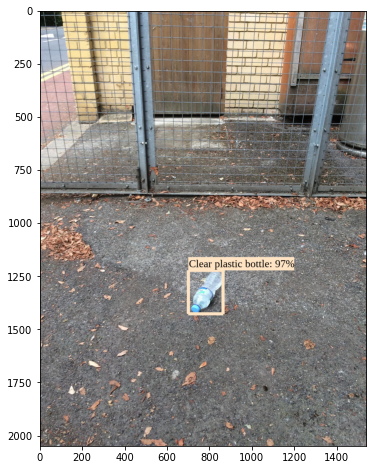

squeeze scores [0.97489727 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.     

In [ ]:
detect(detection_graph, '/content/tacotrashdataset/data/batch_1/000000.jpg')

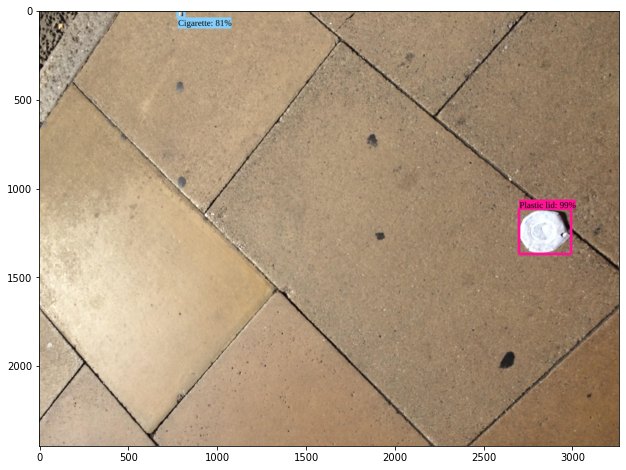

squeeze scores [0.9919621  0.81189847 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.     

In [ ]:
detect(detection_graph, '/content/tacotrashdataset/data/batch_3/IMG_4852.JPG')

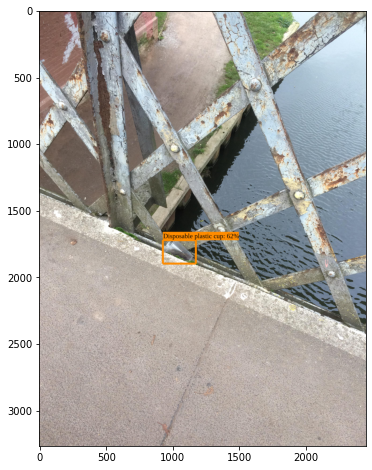

squeeze scores [0.6213874 0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.       ]
category index {1: {'id': 1, 'name': 'Aluminium foil'}, 2: {'id': 2

In [ ]:
detect(detection_graph, '/content/tacotrashdataset/data/batch_6/000000.JPG')

Deployent on streamlit

In [ ]:
#obj detection deployment
%%writefile app.py


import numpy as np
import pandas as pd
import tensorflow as tf
from PIL import Image
from matplotlib import pyplot as plt
from tensorflow.python.util import compat
from tensorflow.core.protobuf import saved_model_pb2
from google.protobuf import text_format
import pprint
import json
import os

# needed to install object_detection library and enlarge labels
# rm -rf ./models && git clone https://github.com/tensorflow/models.git \
#     && sed -i "s#ImageFont.truetype('arial.ttf', 24)#ImageFont.truetype('arial.ttf', 50)#g" ./models/research/object_detection/utils/visualization_utils.py \
#     && cp /usr/share/fonts/truetype/dejavu/DejaVuSans.ttf /usr/share/fonts/truetype/dejavu/arial.ttf

# mkdir /usr/share/fonts/truetype/dejavu

# cp /usr/share/fonts/truetype/liberation/LiberationSerif-Regular.ttf /usr/share/fonts/truetype/dejavu/arial.ttf



# # install object_detection library
# ! cd models/research \
#     && protoc object_detection/protos/*.proto --python_out=. \
#     && cp object_detection/packages/tf2/setup.py . && \
#     python3 -m pip install --use-feature=2020-resolver .

from object_detection.utils import visualization_utils as vis_util
from object_detection.utils import dataset_util, label_map_util
from object_detection.protos import string_int_label_map_pb2

# reconstruct frozen graph
def reconstruct(pb_path):
    if not os.path.isfile(pb_path):
        print("Error: %s not found" % pb_path)

    print("Reconstructing Tensorflow model")
    detection_graph = tf.Graph()
    with detection_graph.as_default():
        od_graph_def = tf.compat.v1.GraphDef()
        with tf.io.gfile.GFile(pb_path, 'rb') as fid:
            serialized_graph = fid.read()
            od_graph_def.ParseFromString(serialized_graph)
            tf.import_graph_def(od_graph_def, name='')
    print("Success!")
    return detection_graph

detection_graph = reconstruct("/content/trained-models-taco-trash-annotations-in-context/ssd_mobilenet_v2_taco_2018_03_29.pb")

DATA_DIR = '/content/tacotrashdataset/data'
ANNOTATIONS_FILE = os.path.join(DATA_DIR, 'annotations.json')
NCLASSES = 60

label_map = label_map_util.load_labelmap('labelmap.pbtxt')
categories = label_map_util.convert_label_map_to_categories(label_map, max_num_classes=NCLASSES, use_display_name=True)
category_index = label_map_util.create_category_index(categories)

# visualize detection
def image2np(image):
    (w, h) = image.size
    return np.array(image.getdata()).reshape((h, w, 3)).astype(np.uint8)

def image2tensor(image):
    npim = image2np(image)
    return np.expand_dims(npim, axis=0)

# %matplotlib inline
def detect(detection_graph, test_image_path):
    with detection_graph.as_default():
        gpu_options = tf.compat.v1.GPUOptions(per_process_gpu_memory_fraction=0.01)
        with tf.compat.v1.Session(graph=detection_graph,config=tf.compat.v1.ConfigProto(gpu_options=gpu_options)) as sess:
            image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')
            detection_boxes = detection_graph.get_tensor_by_name('detection_boxes:0')
            detection_scores = detection_graph.get_tensor_by_name('detection_scores:0')
            detection_classes = detection_graph.get_tensor_by_name('detection_classes:0')
            num_detections = detection_graph.get_tensor_by_name('num_detections:0')

            image = Image.open(test_image_path)
            (boxes, scores, classes, num) = sess.run(
                [detection_boxes, detection_scores, detection_classes, num_detections],
                feed_dict={image_tensor: image2tensor(image)}
            )

            npim = image2np(image)
            vis_util.visualize_boxes_and_labels_on_image_array(
                npim,
                np.squeeze(boxes),
                np.squeeze(classes).astype(np.int32),
                np.squeeze(scores),
                category_index,
                use_normalized_coordinates=True,
                line_thickness=15)
            # plt.figure(figsize=(12, 8))
            # plt.imshow(npim)
            # plt.show()
            
            
            # # print("squeeze boxes", np.squeeze(boxes))
            # print("squeeze scores", np.squeeze(scores))
            # print("category index", category_index)
            # print("Classes", np.squeeze(classes).astype(np.int32))
            # # print("npim", npim)
            # # print("detection scores", detection_scores)
            # # print("num detections", num_detections)
            # print("detection classes", detection_classes)

            # print("Class is:")
            # # print([category_index.get(i) for i in classes[0]: if scores[0, i] > min_score_thresh)])
            # L = ([category_index.get(i) for i in classes[0]])
            # u_value = set( val for dic in L for val in dic.values())
            # print("Unique Values: ",u_value)

            # print(scores[0])

            col1, col2 = st.beta_columns(2)
            st.set_option('deprecation.showPyplotGlobalUse', False)

            col1.subheader("Original Image")
            st.text("")
            plt.figure(figsize = (15,15))
            plt.imshow(image)
            col1.pyplot(use_column_width=False)

            st.text("")
            col2.subheader("Object-Detected Image")
            st.text("")
            plt.figure(figsize = (15,15))
            # plt.savefig("1.jpeg")
            final_output = plt.imshow(npim)
            # final_output
            col2.pyplot(use_column_width=False)
            # final_output.figure.savefig("1.jpg")
            
import streamlit as st
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def object_main():
    """OBJECT DETECTION APP"""

    st.title("Object Detection")
    # st.write("Object detection is a central algorithm in computer vision. The algorithm implemented below is YOLO (You Only Look Once), a state-of-the-art algorithm trained to identify thousands of objects types. It extracts objects from images and identifies them using OpenCV and Yolo. This task involves Deep Neural Networks(DNN), yolo trained model, yolo configuration and a dataset to detect objects.")

    # choice = st.radio("", ("Show Demo", "Browse an Image"))
    st.write()

    st.set_option('deprecation.showfileUploaderEncoding', False)
    image_file = st.file_uploader("Upload Image", type=['jpg','png','jpeg'])

    if image_file is not None:
        # our_image = Image.open(image_file)  
        detect(detection_graph, image_file)

        

    

if __name__ == '__main__':
    object_main()


Overwriting app.py


To get allocated GPU

In [ ]:
# memory footprint support libraries/code
!ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi
!pip install gputil
!pip install psutil
!pip install humanize
import psutil
import humanize
import os
import GPUtil as GPU
GPUs = GPU.getGPUs()
# XXX: only one GPU on Colab and isn’t guaranteed
gpu = GPUs[0]
def printm():
 process = psutil.Process(os.getpid())
 print("Gen RAM Free: " + humanize.naturalsize( psutil.virtual_memory().available ), " | Proc size: " + humanize.naturalsize( process.memory_info().rss))
 print("GPU RAM Free: {0:.0f}MB | Used: {1:.0f}MB | Util {2:3.0f}% | Total {3:.0f}MB".format(gpu.memoryFree, gpu.memoryUsed, gpu.memoryUtil*100, gpu.memoryTotal))
printm()


  Created wheel for gputil: filename=GPUtil-1.4.0-py3-none-any.whl size=7410 sha256=39efcbc94d10d12a8930972c6fd732497d0d9ebd1a68d0b587dbe51148e964bd
  Stored in directory: /root/.cache/pip/wheels/6e/f8/83/534c52482d6da64622ddbf72cd93c35d2ef2881b78fd08ff0c
Successfully built gputil


IndexError: ignored